In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [19]:
dfData = pd.read_csv('./Datasets/DatosProcesados.csv')

In [20]:
dfData.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
0,21,1.62,64.0,1,0,2,3,0,2,0,...,True,False,False,False,True,False,False,True,False,False
1,21,1.52,56.0,1,0,3,3,1,3,1,...,True,False,False,True,False,False,False,True,False,False
2,23,1.80,77.0,1,0,2,3,0,2,0,...,True,False,True,False,False,False,False,True,False,True
3,27,1.80,87.0,0,0,3,3,0,2,0,...,True,False,True,False,False,False,False,False,True,True
4,22,1.78,89.8,0,0,2,1,0,2,0,...,True,False,False,True,False,False,False,True,False,True


In [21]:
X = dfData.drop('NObeyesdad', axis=1)
y = dfData['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1,25)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 1}
Best Score: 0.8874352536301864


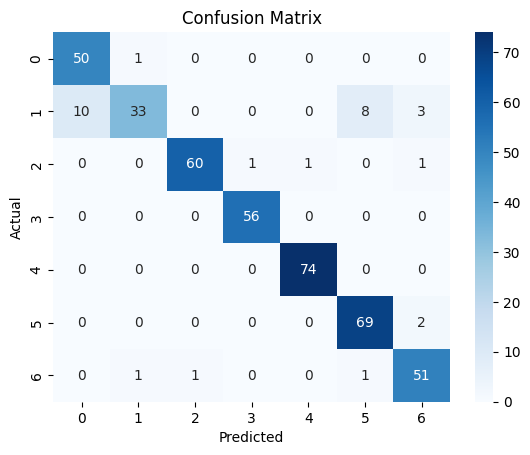

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()
print(df_report)


                     precision    recall  f1-score     support
Insufficient_Weight   0.833333  0.980392  0.900901   51.000000
Normal_Weight         0.942857  0.611111  0.741573   54.000000
Obesity_Type_I        0.983607  0.952381  0.967742   63.000000
Obesity_Type_II       0.982456  1.000000  0.991150   56.000000
Obesity_Type_III      0.986667  1.000000  0.993289   74.000000
Overweight_Level_I    0.884615  0.971831  0.926174   71.000000
Overweight_Level_II   0.894737  0.944444  0.918919   54.000000
accuracy              0.929078  0.929078  0.929078    0.929078
macro avg             0.929753  0.922880  0.919964  423.000000
weighted avg          0.932709  0.929078  0.925169  423.000000
